In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ERROR! Session/line number was not unique in database. History logging moved to new session 1085


In [2]:
# Load data
metadata = pd.read_csv('../../results/opa_metadata_locus.csv', index_col = 0)

# Randomly assign whether each opa is in frame
rng = np.random.default_rng(seed = 0)
random_integers = rng.integers(1, 4, len(metadata))    
random_integers[random_integers!=1] = 0
metadata['random_frame'] = random_integers

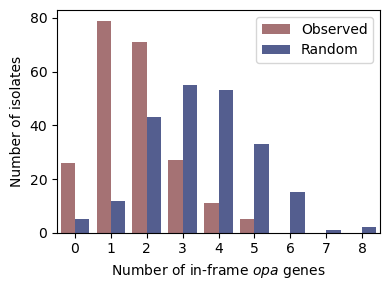

In [3]:
# Plot actual and random distributions of in-frame opa per isolate
strains = []
frac_in_frame = []
num_in_frame = []
random = []
for strain, df in metadata.groupby('strain'):
    strains.append(strain)
    frac_in_frame.append((df['in_frame']==1).sum()/len(df))
    num_in_frame.append((df['in_frame']==1).sum())
    random.append('Observed')

    strains.append(strain)
    frac_in_frame.append((df['random_frame']==1).sum()/len(df))
    num_in_frame.append((df['random_frame']==1).sum())
    random.append('Random')
df_in_frame = pd.DataFrame({'strain':strains, 'num_in_frame':num_in_frame, 'random':random})

# Make plots

fig, ax = plt.subplots(figsize = (4,3))
sns.countplot(df_in_frame, x="num_in_frame", hue = 'random', palette = ["#ad6a6c", "#4a5899"], ax = ax)
legend = ax.legend()
plt.xlabel('Number of in-frame $opa$ genes')
plt.ylabel('Number of isolates')
plt.tight_layout()
plt.savefig("../../figures/frame/frame_on_by_strain_compare_null_dist.png", dpi = 300)
plt.savefig("../../figures/frame/frame_on_by_strain_compare_null_dist.pdf")

In [6]:
# Mean  number in frame in the observed distribution
print('Mean observed in frame per isolate:', np.mean(df_in_frame[df_in_frame['random']=='Observed']['num_in_frame']))
print('Median observed in frame per isolate:', np.median(df_in_frame[df_in_frame['random']=='Observed']['num_in_frame']))

# Mean  number in frame in the random distribution
print('Mean random in frame per isolate:', np.mean(df_in_frame[df_in_frame['random']=='Random']['num_in_frame']))
print('Median random in frame per isolate:', np.median(df_in_frame[df_in_frame['random']=='Random']['num_in_frame']))

# Percent isolates with at least 1 opa in frame
print('Fraction of isolates with at least 1 opa in frame:', (df_in_frame[df_in_frame['random']=='Observed']['num_in_frame']>0).sum()/len(df_in_frame[df_in_frame['random']=='Observed']))

Mean observed in frame per isolate: 1.6940639269406392
Median observed in frame per isolate: 2.0
Mean random in frame per isolate: 3.4383561643835616
Median random in frame per isolate: 3.0
Fraction of isolates with at least 1 opa in frame: 0.8812785388127854
